# TASK1:- TITANIC SURVIVAL PREDICTION
- Using the Titanic dataset to build a model that predict whether a passenger on the Titanic survived or not.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Exploring the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
df['Age'].isnull().sum()

0

In [8]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df['Embarked'].isnull().sum()

2

In [10]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [11]:
df['Embarked'].fillna('S',inplace=True)

In [12]:
df['Embarked']=df['Embarked'].replace({'S':0,'C':1,'Q':2})

In [13]:
df['Sex']=df['Sex'].replace({'male':0,'female':1})

In [14]:
df['Embarked'].unique()

array([0, 1, 2], dtype=int64)

In [15]:
df.drop('Cabin',axis=1,inplace=True)

In [16]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

#### Visualizing the dataset

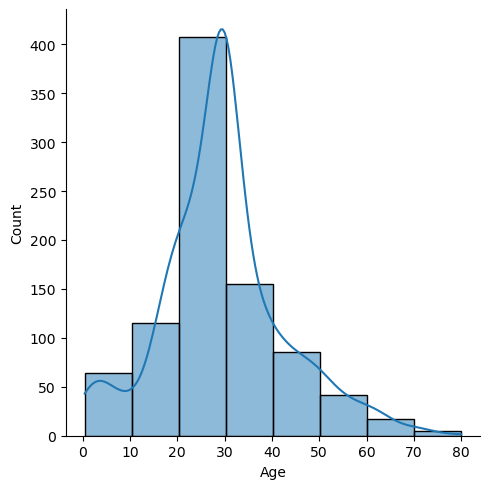

In [19]:
sns.displot(df["Age"],bins=8,kde=True)
plt.show()

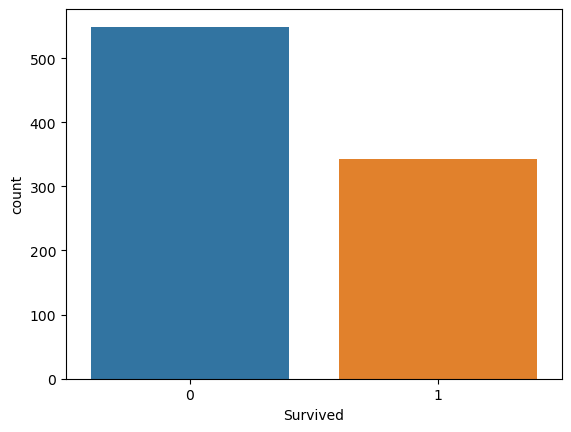

In [20]:
sns.countplot(x=df["Survived"])
plt.show()

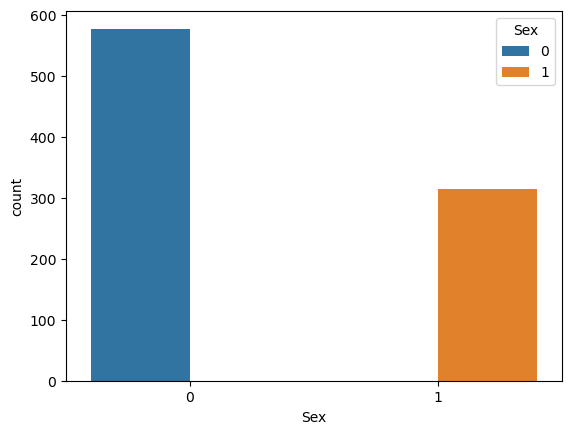

In [21]:
sns.countplot(x=df["Sex"],hue=df["Sex"])
plt.show()

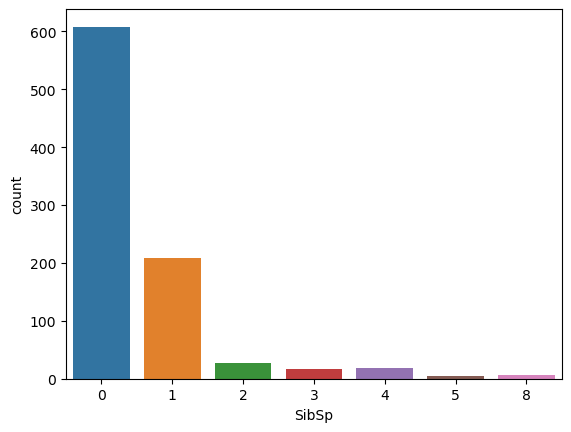

In [22]:
sns.countplot(x=df["SibSp"])
plt.show()

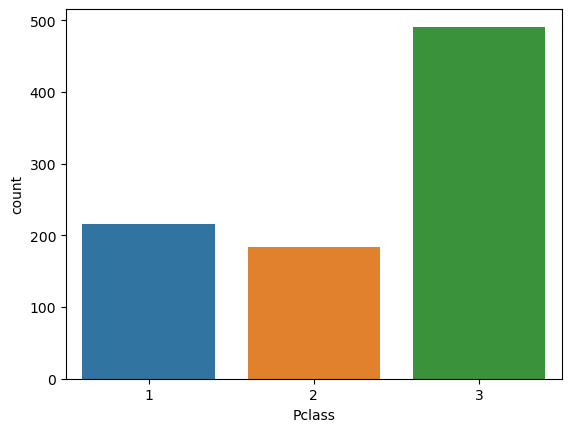

In [23]:
sns.countplot(x=df["Pclass"])
plt.show()

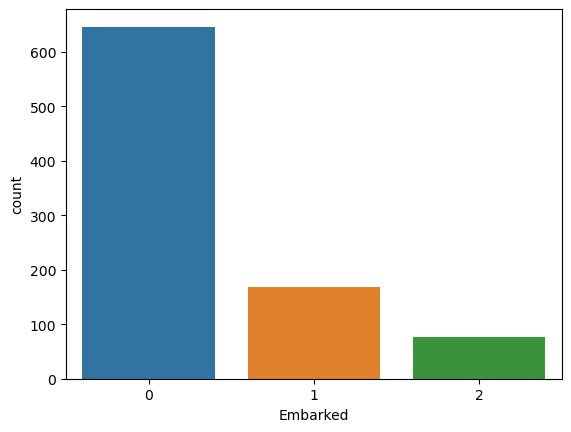

In [24]:
sns.countplot(x=df["Embarked"])
plt.show()

In [25]:
sex_ct = df.groupby('Sex')['Survived'].value_counts().unstack()
sex_ct

Survived,0,1
Sex,,
0,468,109
1,81,233


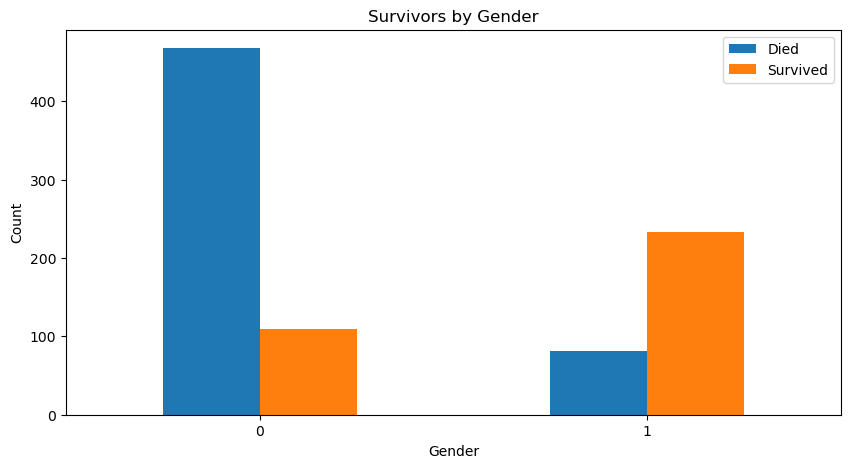

In [26]:
plt.rc('figure', figsize=(10, 5))

sex_ct.plot(kind='bar',)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

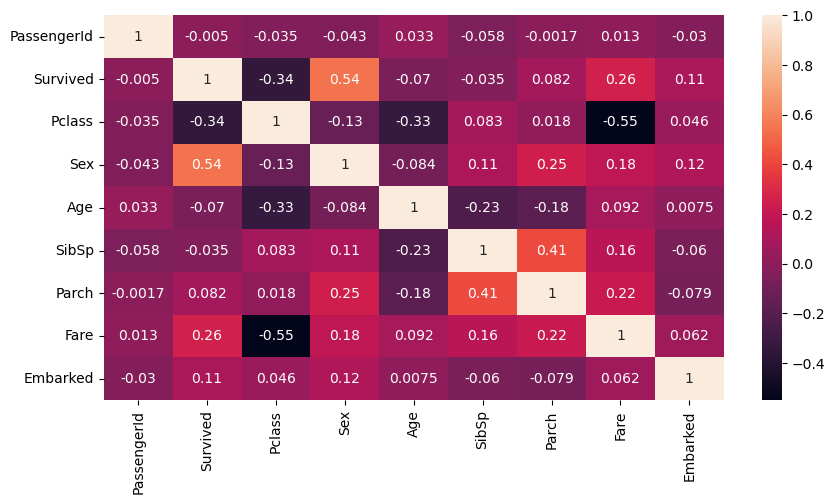

In [27]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [29]:
X=df.drop(columns='Survived')
Y=df['Survived']

#### Best random state

In [30]:
Train=[]
Test=[]
CV=[]
for i in range(0,100):
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=i)
    
    from sklearn.linear_model import LogisticRegression
    le=LogisticRegression()
    le.fit(X_train,Y_train)
    
    Ypred_train=le.predict(X_train)
    Ypred_test=le.predict(X_test)
    
    Train.append(le.score(X_train,Y_train))
    Test.append(le.score(X_test,Y_test))
    
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(le,X,Y,cv=5).mean())
    
a=pd.DataFrame({'Train':Train,'Test':Test,'CV':CV})    
b=a[(abs(a['Train']-a['Test'])<=0.05) & (abs(a['Test']-a['CV'])<=0.05)]
print('best random_state number : ',b[b['Test']==b['Test'].max()].index.to_list()[0])

best random_state number :  5


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

### Modelling
#### logistic regression

In [32]:
#logistic Regression 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

ypred_train=lr.predict(X_train)
ypred_test=lr.predict(X_test)

from sklearn.metrics import accuracy_score
print('Train_accuracy:',accuracy_score(Y_train,ypred_train))
print('Test_accuracy:',accuracy_score(Y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('cvs',cross_val_score(lr,X,Y,cv=5).mean())

Train_accuracy: 0.7949438202247191
Test_accuracy: 0.8379888268156425
cvs 0.7957253154227606


#### random forest

In [33]:

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X,Y)

ypred_train=rf.predict(X_train)
ypred_test=rf.predict(X_test)

print('Train_accuracy:',accuracy_score(Y_train,ypred_train))
print('Test_accuracy:',accuracy_score(Y_test,ypred_test))

print('cvs:',cross_val_score(rf,X,Y,cv=5).mean())

Train_accuracy: 1.0
Test_accuracy: 1.0
cvs: 0.8048207896553888


#### Adaboost classifier

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

#model/estimator
estimator=AdaBoostClassifier()

#parameters grid
param_grid={'n_estimators':list(range(1,51))}

#grid search
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

#fit the data
grid.fit(X,Y)

#best parameters for AdaBoost Model
grid.best_params_

{'n_estimators': 5}

In [35]:
ab=AdaBoostClassifier(n_estimators=5)
ab.fit(X,Y)

ypred_train=ab.predict(X_train)
ypred_test=ab.predict(X_test)

print('Train_accuracy:',accuracy_score(Y_train,ypred_train))
print('Test_accuracy:',accuracy_score(Y_test,ypred_test))

print('cvs',cross_val_score(ab,X,Y,cv=5).mean())

Train_accuracy: 0.7865168539325843
Test_accuracy: 0.8268156424581006
cvs 0.7901701085933086


In [36]:
grid.best_estimator_.feature_importances_

array([0. , 0.2, 0.2, 0.2, 0.2, 0. , 0.2, 0. ])

In [37]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                   index=X.columns,
                   columns=['Importance'])
feats

,Importance
PassengerId,0.0
Pclass,0.2
Sex,0.2
Age,0.2
SibSp,0.2
Parch,0.0
Fare,0.2
Embarked,0.0


In [38]:
important_features=feats[feats['Importance']>0]
important_features

,Importance
Pclass,0.2
Sex,0.2
Age,0.2
SibSp,0.2
Fare,0.2


In [39]:
imp_features_list =feats[feats['Importance']>0].index.to_list()
imp_features_list

['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']

In [40]:
X_imp=X[imp_features_list]
X_imp

,Pclass,Sex,Age,SibSp,Fare
0,3,0,22.000000,1,7.2500
1,1,1,38.000000,1,71.2833
2,3,1,26.000000,0,7.9250
3,1,1,35.000000,1,53.1000
4,3,0,35.000000,0,8.0500
...,...,...,...,...,...
886,2,0,27.000000,0,13.0000
887,1,1,19.000000,0,30.0000
888,3,1,29.699118,1,23.4500
889,1,0,26.000000,0,30.0000


In [41]:
X_imp=X[imp_features_list]
Y=df['Survived']

X_train,X_test,Y_train,Y_test=train_test_split(X_imp,Y,test_size=0.2,random_state=5)

#modelling
ada_bhp = AdaBoostClassifier(n_estimators=5)
ada_bhp.fit(X_train,Y_train)

#prediction
Ypred_train=ada_bhp.predict(X_train)
Ypred_test=ada_bhp.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print('Train accuracy: ',accuracy_score(Y_train,Ypred_train))
print('Test accuracy: ',accuracy_score(Y_test,Ypred_test))

scores=cross_val_score(ada_bhp,X_imp,Y,cv=5)
print('Cross Validation Score: ',scores.mean())

Train accuracy:  0.7865168539325843
Test accuracy:  0.8268156424581006
Cross Validation Score:  0.7901701085933086


#### Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

estimator=GradientBoostingClassifier()

param_grid={'n_estimators':[1,5,10,20],'learning_rate':[0.1,0.2,0.3,0.5,0.8,1,2.0]}

grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

grid.fit(X,Y)

grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 20}

In [43]:
grid.best_estimator_.feature_importances_
feats=pd.DataFrame(index=X.columns,data=grid.best_estimator_.feature_importances_,columns=['Importance'])
imp_features=feats[feats["Importance"]>0.01]
imp_features_list=feats[feats["Importance"]>0.01].index.to_list()
imp_features_list

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

In [44]:
# Select important features
x_imp = X[imp_features_list]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_imp, Y, test_size=0.2, random_state=20)

# Modeling with Gradient Boosting Classifier
gb_bhp = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1)
gb_bhp.fit(x_train, y_train)

# Prediction
ypred_train = gb_bhp.predict(x_train)
ypred_test = gb_bhp.predict(x_test)

# Calculate accuracy scores
gb_train_accuracy = accuracy_score(y_train, ypred_train)
gb_test_accuracy = accuracy_score(y_test, ypred_test)
gb_cvs = cross_val_score(gb_bhp, X, Y).mean()

# Evaluation
print("train accuracy:", gb_train_accuracy)
print("test accuracy:", gb_test_accuracy)
print("cross val score:", gb_cvs)

train accuracy: 0.8398876404494382
test accuracy: 0.8268156424581006
cross val score: 0.7947335383842822


#### XGB Classifier

In [45]:
from xgboost import XGBClassifier
estimator=XGBClassifier()

param_grid={'n_estimators':[10,20,30,40,50],'max_depth':[2,3,4,5],'gamma':[0,0.2,0.3,0.5,0.8,1]}

grid=GridSearchCV(estimator,param_grid,scoring='accuracy')

grid.fit(X,Y)

grid.best_params_

{'gamma': 0, 'max_depth': 2, 'n_estimators': 20}

In [46]:
grid.best_estimator_.feature_importances_
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                  index=X.columns,columns=["Importance"])
important_features=feats[feats["Importance"]>0.01]
imp_feature_list=feats[feats["Importance"]>0.01].index.to_list()

In [47]:
x_imp=X[imp_feature_list]
x_train, x_test, y_train, y_test = train_test_split(x_imp, Y, test_size=0.2, random_state=20)
xgb_model=XGBClassifier(n_estimators=20,max_depth=2,gamma=0)
xgb_model.fit(x_train,y_train)

##
ypred_train=xgb_model.predict(x_train)
ypred_test=xgb_model.predict(x_test)

xgb_train_accuracy = accuracy_score(y_train, ypred_train)
xgb_test_accuracy = accuracy_score(y_test, ypred_test)
xgb_cvs = cross_val_score(gb_bhp, X,Y).mean()

# Evaluation
print("train accuracy:", xgb_train_accuracy)
print("test accuracy:", xgb_test_accuracy)
print("cross val score:", xgb_cvs)

train accuracy: 0.8412921348314607
test accuracy: 0.8212290502793296
cross val score: 0.7947335383842822


### Adaboost is the best model

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[104,   8],
       [ 24,  43]], dtype=int64)

#### Deployment of the best model

In [49]:
from joblib import dump
dump(ada_bhp,"titanic_survival_prediction.joblib")

['titanic_survival_prediction.joblib']